# Support Vector Machine

## 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## 2. Import the libraries

In [2]:
dataset = pd.read_csv('wine_updated.csv')
x = dataset[['Alcohol', 'Ash']].values
y = dataset['Class'].values

## 3. Splitting the dataset into training and test set

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4. Feature Scaling

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 5. Training the SVM model on the training set

In [6]:
svc = SVC(kernel='linear', random_state=0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

## 6. Predicting a new result

In [8]:
y_pred = svc.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[13  0  1]
 [ 0 14  0]
 [ 4  0  4]]


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 86.11%


## 7. Predict on new data

In [11]:
new_data = np.array([[14, 3.2], [12.7, 1.5], [13.4, 2.7]])
scaled_new_data = sc.transform(new_data)
new_result = svc.predict(scaled_new_data)
print('Predictions for new data points: ', new_result)

Predictions for new data points:  [1 2 1]


## 8. Visualizing the training set results

Text(0.5, 0, 'Alcohol')

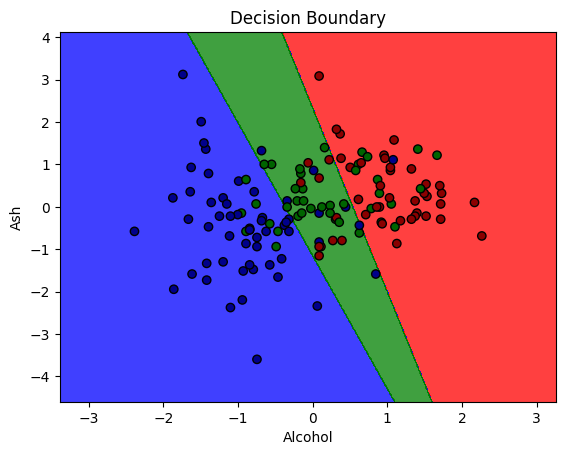

In [13]:
x1_range = np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
x2_range = np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)
x1, x2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = svc.predict(grid_points).reshape(x1.shape)
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolor='k')
plt.title('Decision Boundary')
plt.ylabel('Ash')
plt.xlabel('Alcohol')

## 9. Visualizing the test set results

Text(0.5, 0, 'Alcohol')

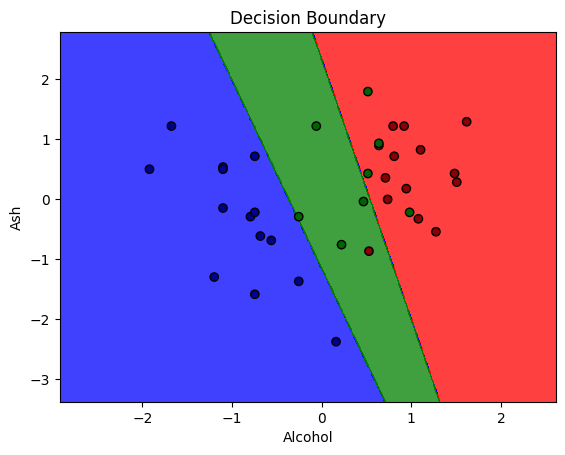

In [14]:
x1_range = np.arange(start=x_test[:,0].min()-1, stop=x_test[:,0].max()+1, step=0.01)
x2_range = np.arange(start=x_test[:,1].min()-1, stop=x_test[:,1].max()+1, step=0.01)
x1, x2 = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1.ravel(), x2.ravel()]
grid_predict = svc.predict(grid_points).reshape(x1.shape)
plt.contourf(x1, x2, grid_predict, alpha=0.75, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(x_test[:,0], x_test[:, 1], c=y_test, cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']), edgecolor='k')
plt.title('Decision Boundary')
plt.ylabel('Ash')
plt.xlabel('Alcohol')